### downloading the specified dataset and preprocessing it to converto tf_records


Only few dataset names are mentioned and among them,

1. Ciaf10
2. MNIST

are downloaded and shown how the conversion to tf_record happens.


The same can be extended to multiple datasets

In [0]:
!pip install wget
import wget
import zipfile
import tarfile
import numpy as np
import matplotlib.pyplot as plt
import pickle

def unpickle(file):
    """load the cifar-10 data"""

    with open(file, 'rb') as fo:
        data = pickle.load(fo, encoding='bytes')
    return data


def load_cifar_10_data(data_dir, negatives=False):
    """
    Return train_data, train_filenames, train_labels, test_data, test_filenames, test_labels
    """

    # get the meta_data_dict
    # num_cases_per_batch: 1000
    # label_names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    # num_vis: :3072

    meta_data_dict = unpickle(data_dir + "/batches.meta")
    cifar_label_names = meta_data_dict[b'label_names']
    cifar_label_names = np.array(cifar_label_names)

    # training data
    cifar_train_data = None
    cifar_train_filenames = []
    cifar_train_labels = []

    # cifar_train_data_dict
    # 'batch_label': 'training batch 5 of 5'
    # 'data': ndarray
    # 'filenames': list
    # 'labels': list

    for i in range(1, 6):
        cifar_train_data_dict = unpickle(data_dir + "/data_batch_{}".format(i))
        if i == 1:
            cifar_train_data = cifar_train_data_dict[b'data']
        else:
            cifar_train_data = np.vstack((cifar_train_data, cifar_train_data_dict[b'data']))
        cifar_train_filenames += cifar_train_data_dict[b'filenames']
        cifar_train_labels += cifar_train_data_dict[b'labels']

    cifar_train_data = cifar_train_data.reshape((len(cifar_train_data), 3, 32, 32))
    if negatives:
        cifar_train_data = cifar_train_data.transpose(0, 2, 3, 1).astype(np.float32)
    else:
        cifar_train_data = np.rollaxis(cifar_train_data, 1, 4)
    cifar_train_filenames = np.array(cifar_train_filenames)
    cifar_train_labels = np.array(cifar_train_labels)

    # test data
    # cifar_test_data_dict
    # 'batch_label': 'testing batch 1 of 1'
    # 'data': ndarray
    # 'filenames': list
    # 'labels': list

    cifar_test_data_dict = unpickle(data_dir + "/test_batch")
    cifar_test_data = cifar_test_data_dict[b'data']
    cifar_test_filenames = cifar_test_data_dict[b'filenames']
    cifar_test_labels = cifar_test_data_dict[b'labels']

    cifar_test_data = cifar_test_data.reshape((len(cifar_test_data), 3, 32, 32))
    if negatives:
        cifar_test_data = cifar_test_data.transpose(0, 2, 3, 1).astype(np.float32)
    else:
        cifar_test_data = np.rollaxis(cifar_test_data, 1, 4)
    cifar_test_filenames = np.array(cifar_test_filenames)
    cifar_test_labels = np.array(cifar_test_labels)

    return cifar_train_data, cifar_train_filenames, cifar_train_labels, \
        cifar_test_data, cifar_test_filenames, cifar_test_labels, cifar_label_names


def cifar_loader():
    """show it works"""
    print("Processing CIFAR10 ...")
    cifar_10_dir = 'data/cifar-10-batches-py'

    train_data, train_filenames, train_labels, test_data, test_filenames, test_labels, label_names = \
        load_cifar_10_data(cifar_10_dir)

    print("Train data: ", train_data.shape)
    print("Train filenames: ", train_filenames.shape)
    print("Train labels: ", train_labels.shape)
    print("Test data: ", test_data.shape)
    print("Test filenames: ", test_filenames.shape)
    print("Test labels: ", test_labels.shape)
    print("Label names: ", label_names.shape)

    # Don't forget that the label_names and filesnames are in binary and need conversion if used.

    # display some random training images in a 25x25 grid
    num_plot = 5
    f, ax = plt.subplots(num_plot, num_plot)
    for m in range(num_plot):
        for n in range(num_plot):
            idx = np.random.randint(0, train_data.shape[0])
            ax[m, n].imshow(train_data[idx])
            ax[m, n].get_xaxis().set_visible(False)
            ax[m, n].get_yaxis().set_visible(False)
    f.subplots_adjust(hspace=0.1)
    f.subplots_adjust(wspace=0)
    plt.show()

def get_dataset(name):
    datasets = {
            "CIFAR10":"https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
            # for time being, i have just kept on url to retrive and download
        }
    if name not in datasets:
        all_datasets = datasets.keys()
        msg = "Please enter proper dataset name from the above list."
        print(all_datasets)
        return msg

    !mkdir data
    !cd data
    
    print("Dataset: Starting download...")
    url = datasets[name]
    file_name = wget.download(url)
    print("Dataset: Downloading finished...")
    print("Extracting dataset...")
    if (file_name.endswith("tar.gz")):
        with tarfile.open(file_name, "r:gz") as tar:
            tar.extractall("./data")
    elif (file_name.endswith("zip")):
        with zipfile.ZipFile(file_name, 'r') as zip_ref:
            zip_ref.extractall("./data")
    print("Extracted successfully in data/ ")
    if name=="CIFAR10":
      cifar_loader()

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9681 sha256=28fdd0eeac6f3a05098b3d28f51ef73a4c9408453e853ad9a55627a1ee023bbb
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


Dataset: Starting download...
Dataset: Downloading finished...
Extracting dataset...
Extracted successfully in data/ 
Processing CIFAR10 ...
Train data:  (50000, 32, 32, 3)
Train filenames:  (50000,)
Train labels:  (50000,)
Test data:  (10000, 32, 32, 3)
Test filenames:  (10000,)
Test labels:  (10000,)
Label names:  (10,)


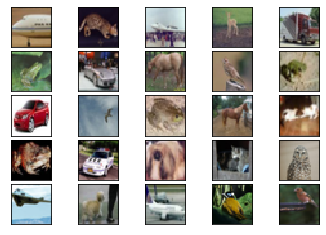

In [0]:
get_dataset("CIFAR10")

In [0]:
!pip install wget
import wget
import zipfile
import tarfile
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import sys

import tarfile
from six.moves import cPickle as pickle
from six.moves import xrange  # pylint: disable=redefined-builtin
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [0]:
dataset_config = [
    "CIFAR10",
    "MNIST",
    "IMAGENET",
    "TINYIMAGENET"
]


def _int64_feature(value):
  return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))


def _bytes_feature(value):
  return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))


In [0]:
def cifar10_loader():
    CIFAR_FILENAME = 'cifar-10-python.tar.gz'
    CIFAR_DOWNLOAD_URL = 'https://www.cs.toronto.edu/~kriz/' + CIFAR_FILENAME
    CIFAR_LOCAL_FOLDER = 'cifar-10-batches-py'


    def download_and_extract(data_dir):
      # download CIFAR-10 if not already downloaded.
      tf.contrib.learn.datasets.base.maybe_download(CIFAR_FILENAME, data_dir,
                                                    CIFAR_DOWNLOAD_URL)
      tarfile.open(os.path.join(data_dir, CIFAR_FILENAME),
                  'r:gz').extractall(data_dir)

    def _get_file_names():
      """Returns the file names expected to exist in the input_dir."""
      file_names = {}
      file_names['train'] = ['data_batch_%d' % i for i in xrange(1, 5)]
      file_names['validation'] = ['data_batch_5']
      file_names['eval'] = ['test_batch']
      return file_names


    def read_pickle_from_file(filename):
      with tf.gfile.Open(filename, 'rb') as f:
        if sys.version_info >= (3, 0):
          data_dict = pickle.load(f, encoding='bytes')
        else:
          data_dict = pickle.load(f)
      return data_dict


    def convert_to_tfrecord(input_files, output_file):
      """Converts a file to TFRecords."""
      print('Generating %s' % output_file)
      with tf.python_io.TFRecordWriter(output_file) as record_writer:
        for input_file in input_files:
          data_dict = read_pickle_from_file(input_file)
          data = data_dict[b'data']
          labels = data_dict[b'labels']
          num_entries_in_batch = len(labels)
          for i in range(num_entries_in_batch):
            example = tf.train.Example(features=tf.train.Features(
                feature={
                    'image': _bytes_feature(data[i].tobytes()),
                    'label': _int64_feature(labels[i])
                }))
            record_writer.write(example.SerializeToString())

    data_dir = "./"
    print('Download from {} and extract.'.format(CIFAR_DOWNLOAD_URL))
    download_and_extract(data_dir)
    file_names = _get_file_names()
    input_dir = os.path.join(data_dir, CIFAR_LOCAL_FOLDER)
    for mode, files in file_names.items():
      input_files = [os.path.join(input_dir, f) for f in files]
      output_file = os.path.join(data_dir, mode + '.tfrecords')
      try:
        os.remove(output_file)
      except OSError:
        pass
      # Convert to tf.train.Example and write the to TFRecords.
      convert_to_tfrecord(input_files, output_file)
    print('Done! CIFAR10 is now present at your working directory')

In [0]:
def mnist_loader():
    def _data_path(data_directory:str, name:str) -> str:

      if not os.path.isdir(data_directory):
          os.makedirs(data_directory)

      return os.path.join(data_directory, f'{name}.tfrecords')

    def _int64_feature(value:int) -> tf.train.Features.FeatureEntry:
        return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

    def _bytes_feature(value:str) -> tf.train.Features.FeatureEntry:
        return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

    def convert_to(data_set, name:str, data_directory:str, num_shards:int=1):
        print(f'Processing {name} data')

        images = data_set.images
        labels = data_set.labels
        
        num_examples, rows, cols, depth = data_set.images.shape

        def _process_examples(start_idx:int, end_index:int, filename:str):
            with tf.python_io.TFRecordWriter(filename) as writer:
                for index in range(start_idx, end_index):
                    sys.stdout.write(f"\rProcessing sample {index+1} of {num_examples}")
                    sys.stdout.flush()

                    image_raw = images[index].tostring()
                    example = tf.train.Example(features=tf.train.Features(feature={
                        'height': _int64_feature(rows),
                        'width': _int64_feature(cols),
                        'depth': _int64_feature(depth),
                        'label': _int64_feature(int(labels[index])),
                        'image_raw': _bytes_feature(image_raw)
                    }))
                    writer.write(example.SerializeToString())
        
        if num_shards == 1:
            _process_examples(0, data_set.num_examples, _data_path(data_directory, name))
        else:
            total_examples = data_set.num_examples
            samples_per_shard = total_examples // num_shards

            for shard in range(num_shards):
                start_index = shard * samples_per_shard
                end_index = start_index + samples_per_shard
                _process_examples(start_index, end_index, _data_path(data_directory, f'{name}-{shard+1}'))

        print()

    def convert_to_tf_record(data_directory:str):

        mnist = input_data.read_data_sets(
            "/tmp/tensorflow/mnist/input_data", 
            reshape=False
        )
        
        convert_to(mnist.validation, 'validation', data_directory)
        convert_to(mnist.train, 'train', data_directory, num_shards=10)
        convert_to(mnist.test, 'test', data_directory)

    convert_to_tf_record(os.path.expanduser("./"))

In [0]:
def download_dataset(dataset_name):
    if dataset_name not in dataset_config:
        print(list(dataset_config.keys()))
        msg = "Please enter dataset name from the above dataset list"
        return msg
    else:
        print("Downloading your dataset...")
    
    if(dataset_name == "CIFAR10"):
      return cifar10_loader()

    if(dataset_name == "MNIST"):
      return mnist_loader()

In [0]:
download_dataset("CIFAR10")

Download from https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz and extract.
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded cifar-10-python.tar.gz 170498071 bytes.
Generating ./train.tfrecords
Generating ./validation.tfrecords
Generating ./eval.tfrecords
Done! CIFAR10 is now present at your working directory


In [0]:
download_dataset("MNIST")

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/tensorflow/mnist/input_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/tensorflow/mnist/input_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/tensorflow/mnist/input_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/tensorflow/mnist/input_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Processing validation data
Processing sample 5000 of 5000
Processing train data
Proce